# Diamonds Analysis - DSIC 100 Project Proposal
###### Group 5: Clare Pan, Wendy Phung, Jessie Sheng, Jason Wang

## Introduction
Diamond is a mineral composed of pure carbon, in which each carbon atom is attached to four other carbon atoms, making the diamond a very strong structure. The hardness of diamond and its high dispersion of light make it useful for industrial applications and desirable as jewelry. Even the smallest difference between two diamonds could make one much more valuable than the other. For this reason, multiple organizations are using the “four Cs”, which are color, cut, clarity, and carat, to certify and grade diamonds. In this project, we will use a data set from Kaggle to predict the diamonds price using the four Cs.

## Preliminary exploratory data analysis

#### Loading the libraries

In [10]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(cowplot)

#### Reading dataset from web into R

In [11]:
url <- "https://raw.githubusercontent.com/cpan0/project_proposal/main/diamonds.csv"
diamonds <- read_csv(url)
diamonds <- diamonds %>% 
    select(carat, cut, color, clarity, price)   # selecting the necessary variables/columns
head(diamonds)

Parsed with column specification:
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double(),
  price = col_double()
)



carat,cut,color,clarity,price
<dbl>,<chr>,<chr>,<chr>,<dbl>
0.23,Ideal,E,SI2,326
0.21,Premium,E,SI1,326
0.23,Good,E,VS1,327
0.29,Premium,I,VS2,334
0.31,Good,J,SI2,335
0.24,Very Good,J,VVS2,336


#### Splitting the dataset into training (75%) and testing (25%) datasets based on cut

In [12]:
set.seed(1)

diamonds_split <- initial_split(diamonds, prop = 0.75, strata = cut)
diamonds_train <- training(diamonds_split)
diamonds_test <- testing(diamonds_split) 

glimpse(diamonds_train)
glimpse(diamonds_test)

Rows: 40,456
Columns: 5
$ carat   <dbl> 0.23, 0.23, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.23, 0.31, 0…
$ cut     <chr> "Ideal", "Good", "Good", "Very Good", "Very Good", "Very Good…
$ color   <chr> "E", "E", "J", "J", "I", "H", "E", "H", "J", "J", "E", "E", "…
$ clarity <chr> "SI2", "VS1", "SI2", "VVS2", "VVS1", "SI1", "VS2", "VS1", "VS…
$ price   <dbl> 326, 327, 335, 336, 336, 337, 337, 338, 340, 344, 345, 345, 3…
Rows: 13,484
Columns: 5
$ carat   <dbl> 0.21, 0.29, 0.30, 0.22, 0.23, 0.23, 0.23, 0.23, 0.26, 0.32, 0…
$ cut     <chr> "Premium", "Premium", "Good", "Premium", "Very Good", "Very G…
$ color   <chr> "E", "I", "J", "F", "F", "F", "F", "D", "D", "H", "F", "I", "…
$ clarity <chr> "SI1", "VS2", "SI1", "SI1", "VS1", "VS1", "VS1", "VS1", "VS2"…
$ price   <dbl> 326, 334, 339, 342, 357, 402, 402, 402, 403, 403, 404, 405, 5…


#### Exploratory data analysis (summary)

##### Range, mean and standard deviation of diamond carat in the training data

In [13]:
diamonds_carat_min_max <- diamonds_train %>% 
    summarize(min_carat = min(carat),
             max_carat = max(carat),
             mean_carat = mean(carat),
             sd_carat = sd(carat))
diamonds_carat_min_max

min_carat,max_carat,mean_carat,sd_carat
<dbl>,<dbl>,<dbl>,<dbl>
0.2,4.5,0.7958088,0.4728762


##### Number of each cuts in the training data

In [14]:
diamonds_cut_n <- diamonds_train %>% 
    group_by(cut) %>% 
    summarize(n = n())
diamonds_cut_n

`summarise()` ungrouping output (override with `.groups` argument)



cut,n
<chr>,<int>
Fair,1209
Good,3711
Ideal,16149
Premium,10317
Very Good,9070


##### Number of each clarity in the training data

In [15]:
diamonds_clarity_n <- diamonds_train %>% 
    group_by(clarity) %>% 
    summarize(n = n())
diamonds_clarity_n

`summarise()` ungrouping output (override with `.groups` argument)



clarity,n
<chr>,<int>
I1,543
IF,1368
SI1,9786
SI2,6938
VS1,6090
VS2,9182
VVS1,2718
VVS2,3831


##### Number of each color in the training data

In [16]:
diamonds_color_n <- diamonds_train %>% 
    group_by(color) %>% 
    summarize(n = n())
diamonds_color_n

`summarise()` ungrouping output (override with `.groups` argument)



color,n
<chr>,<int>
D,5106
E,7342
F,7108
G,8512
H,6238
I,4072
J,2078


##### Range, mean and standard deviation of diamond price in the training data

In [17]:
diamonds_price_min_max <- diamonds_train %>% 
    summarize(min_price = min(price),
             max_price = max(price),
             mean_price = mean(price),
             sd_price = sd(price))
diamonds_price_min_max

min_price,max_price,mean_price,sd_price
<dbl>,<dbl>,<dbl>,<dbl>
326,18818,3918.906,3984.433


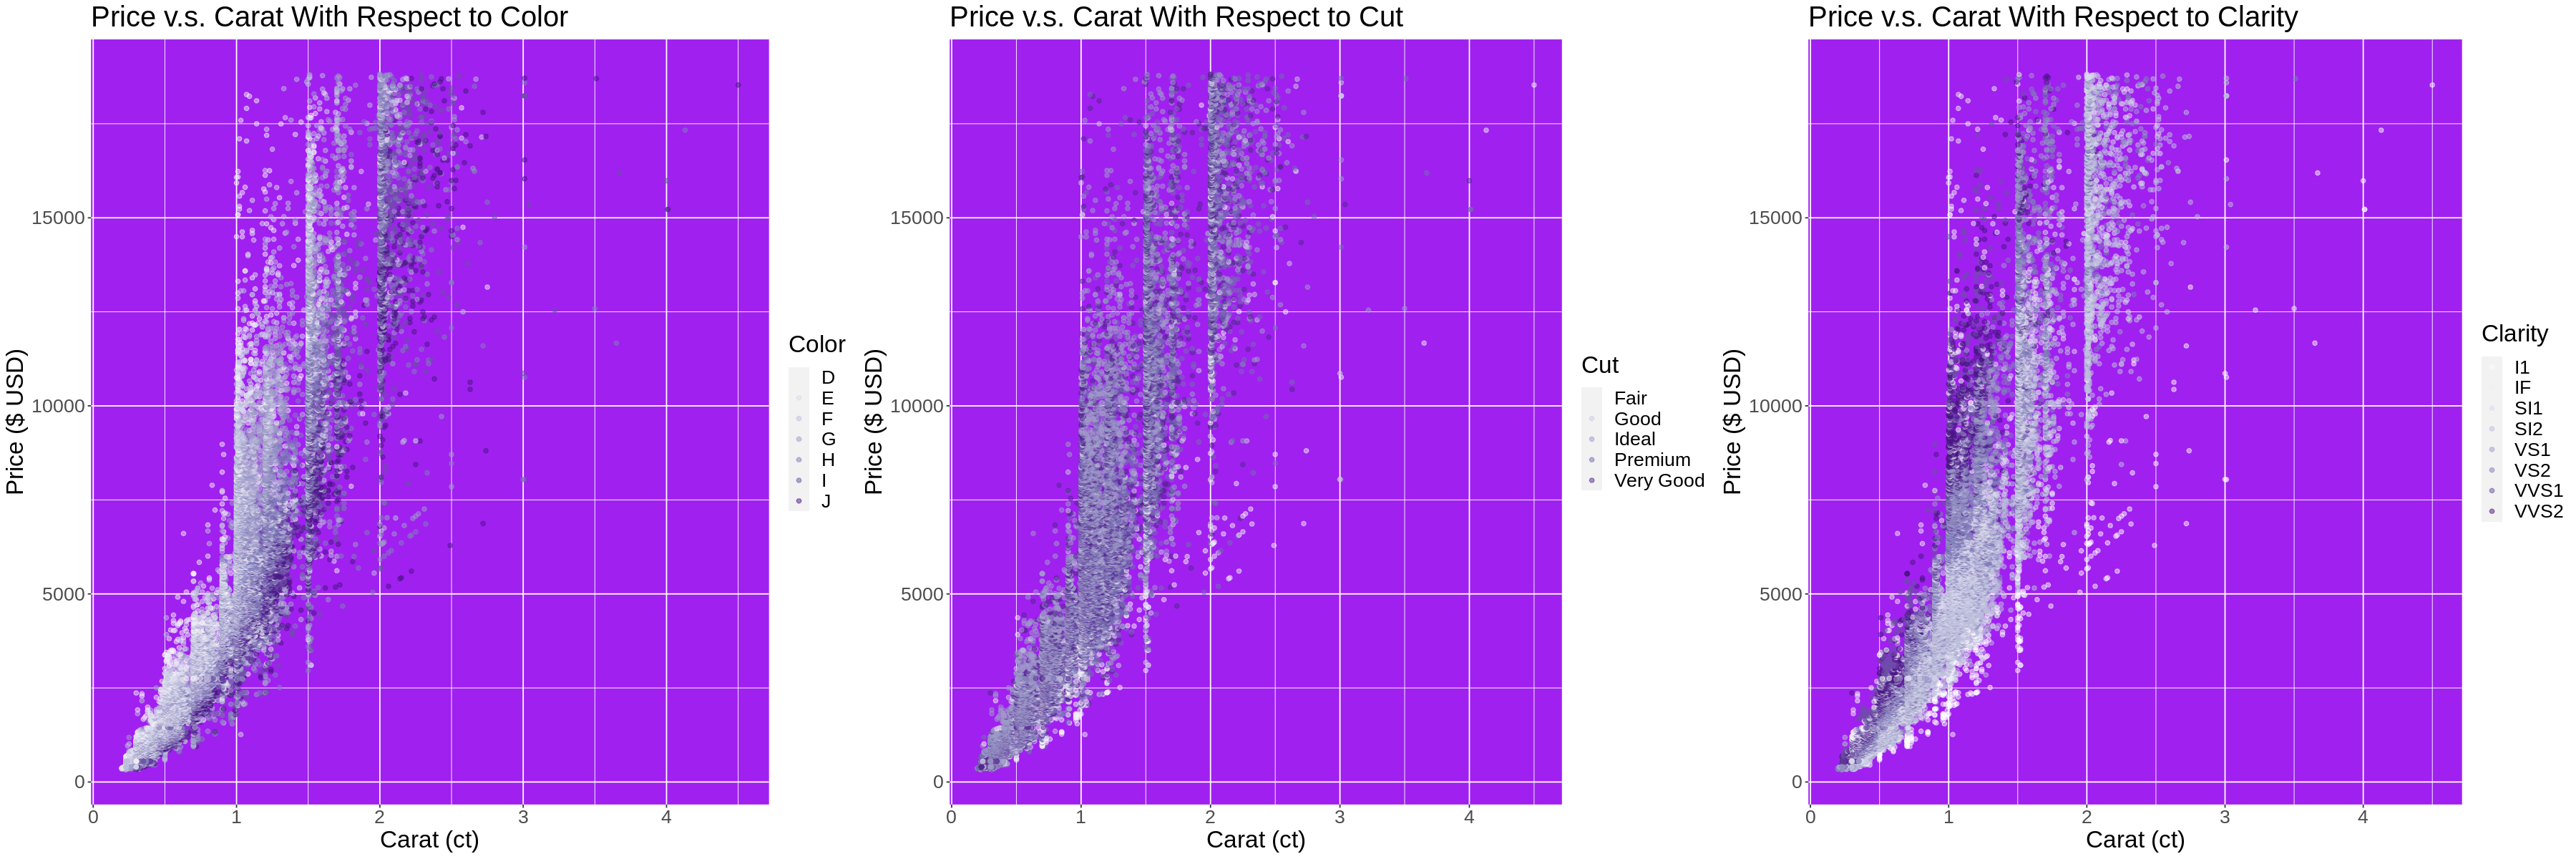

In [36]:
options(repr.plot.width = 30, repr.plot.height = 10)

# exploratory data analysis (visualization)
diamonds_color_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = color)) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Color", x = "Carat (ct)", y = "Price ($ USD)", color = "Color") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Purples") +
    theme(panel.background = element_rect(fill = "purple"))


diamonds_cut_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = cut)) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Cut", x = "Carat (ct)", y = "Price ($ USD)", color = "Cut") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Purples") +
    theme(panel.background = element_rect(fill = "purple"))

diamonds_clarity_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = clarity)) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Clarity", x = "Carat (ct)", y = "Price ($ USD)", color = "Clarity") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Purples") +
    theme(panel.background = element_rect(fill = "black"))

plot_grid(diamonds_color_plot, diamonds_cut_plot, diamonds_clarity_plot, nrow = 1)

## Methods

A diamond’s value is based on the four Cs; colour, clarity, cut, and carat. Thus, these will be the columns that we use for our project. As we are predicting a numerical value, our model will use the K-nearest neighbours method for regression. Since the carat variable is numerical, we will standardize it. To build our model, we will first split our initial data so that 75% of it will be used in the training data and the remaining 25% for our test data. As this process is random, we will make sure to set a seed so that our code is reproducible. With our training data, we will then apply cross-validation to determine the optimal K value. With the K value determined, we can then build our model.

To visualize our results, we will create 3 graphs all with carat on the x-axes and price on the y-axis. Each graph will visualize one of each three categorical predictors.



## Expected outcomes and significance:
We expect to find a positive, exponential relationship between a diamond’s carat and price in our regression model as larger pieces are harder to find (thus worth substantially more). Additionally, we believe higher quality/less common attributes in the cut, clarity and colour properties will result in more expensive diamonds. These will be evident and reflect in our predictions. 


With our model, we can predict the price of a diamond given a set of properties. Knowing a rough estimate is beneficial to buyers as they can make comparisons with the market price to determine if it is reasonable before purchasing, and can help those selling diamonds list it for what it's worth.

Lastly, observations from our regression model can lead to further questions and analysis on why some properties result in greater price contrast, and whether there are other variables not considered that also have significant impact on diamond prices. For future studies, we may also choose to expand our model to account for the other properties, such as a diamond’s table and depth, when predicting diamond prices. 
